___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Logistic Regression

## Imports

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [31]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [32]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [34]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [35]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

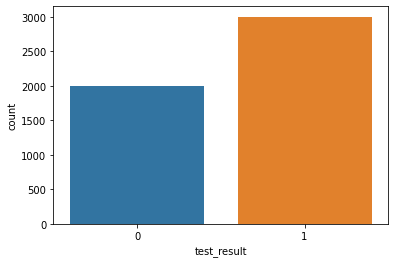

In [36]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

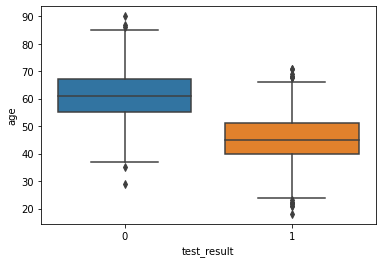

In [37]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

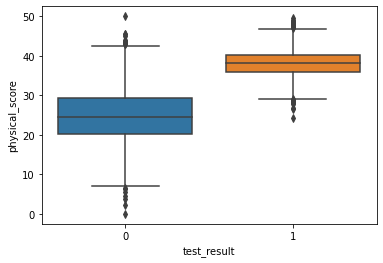

In [38]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

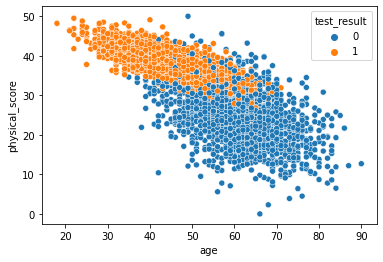

In [39]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

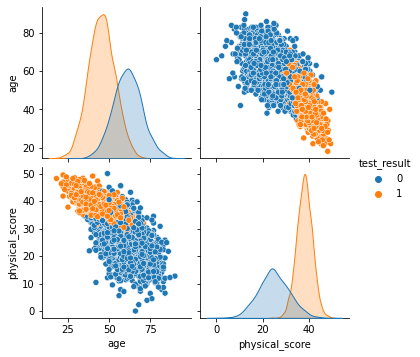

In [40]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

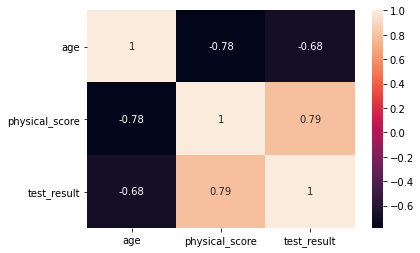

In [41]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

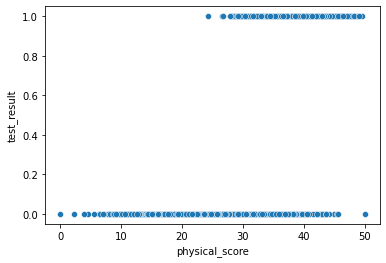

In [42]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

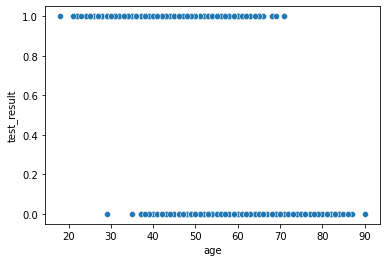

In [43]:
sns.scatterplot(x='age',y='test_result',data=df)

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

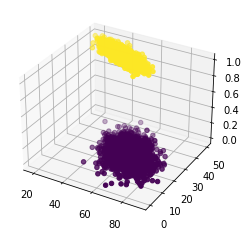

In [44]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

### Train | Test Split and Scaling

In [45]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [48]:
scaler = StandardScaler()

In [49]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# help(LogisticRegression)

In [52]:
# help(LogisticRegressionCV)

In [53]:
log_model = LogisticRegression()

In [54]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Make sure to watch the video explanation, also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta _{1}$$ 

The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.

In [55]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

### Model Performance on Classification Tasks

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [57]:
y_pred = log_model.predict(scaled_X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.93

In [59]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

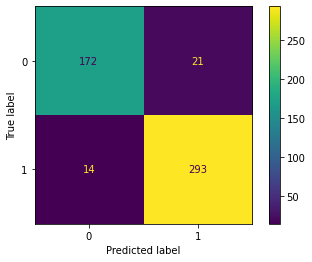

In [60]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

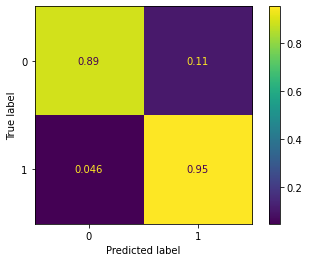

In [61]:
# Scaled so highest value=1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [63]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [64]:
y_train.iloc[0]

1

In [65]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [66]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

## Evaluating Curves and AUC

**Make sure to watch the video on this!**

In [67]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

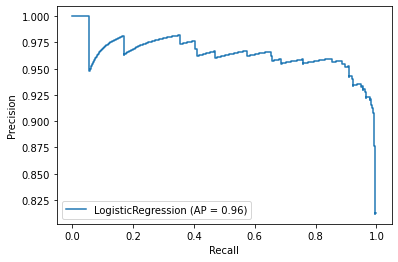

In [70]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

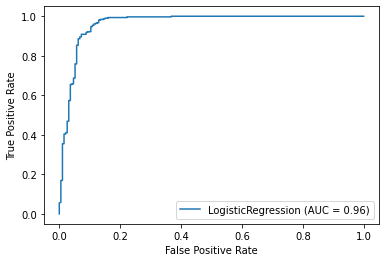

In [71]:
plot_roc_curve(log_model,scaled_X_test,y_test)

------
------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='physical_score'>

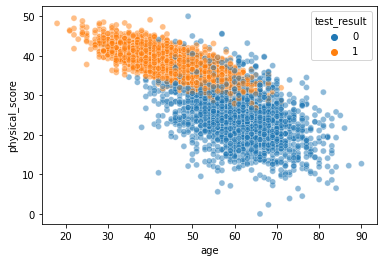

In [24]:
sns.scatterplot(x="age",y="physical_score", data=df, hue="test_result", alpha=0.5)

<AxesSubplot:xlabel='test_result', ylabel='count'>

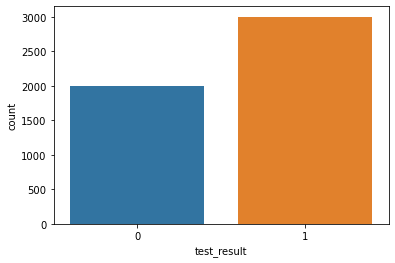

In [6]:
sns.countplot(data=df, x="test_result")

In [7]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='age'>

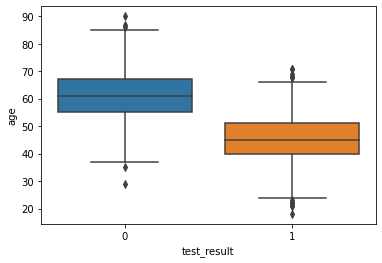

In [10]:
sns.boxplot(data=df, y="age", x="test_result")

<AxesSubplot:>

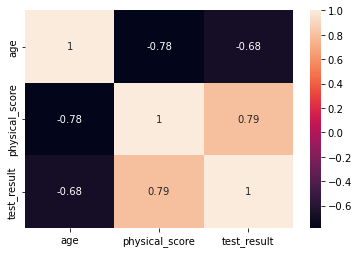

In [14]:
sns.heatmap(df.corr(), annot=True)

In [13]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


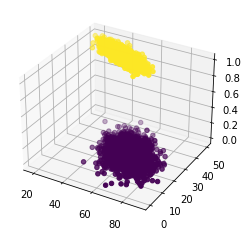

In [20]:
# 3d scatter plot gives complete separation between class so, prediction and performance for our model can be high
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df["age"], df["physical_score"],df["test_result"],  c=df["test_result"])

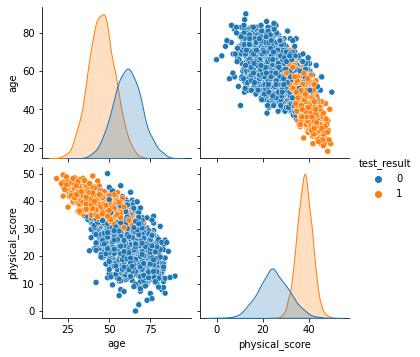

In [26]:
sns.pairplot(df, hue="test_result")

In [27]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [28]:
X=df.drop("test_result", axis=1)

In [29]:
y=df["test_result"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [34]:
sc=StandardScaler()

In [35]:
X_train=sc.fit_transform(X_train)

In [36]:
X_test=sc.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [39]:
model=LogisticRegression()

In [40]:
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
pr_test=model.predict(X_test)

In [42]:
pr_test

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [43]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [44]:
pr_test_proba=model.predict_proba(X_test)

In [45]:
pr_test_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [46]:
from sklearn.metrics import accuracy_score, recall_score,precision_score

In [47]:
accuracy_score(y_test, pr_test)

0.93

In [48]:
recall_score(y_test, pr_test)

0.9543973941368078

In [49]:
precision_score(y_test, pr_test)

0.9331210191082803

In [52]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [53]:
confusion_matrix(y_test, pr_test)

array([[172,  21],
       [ 14, 293]])

In [61]:
print(classification_report(y_test, pr_test))
# if model performing reasonably well then precision and recall(sensitivity) should be close to accuracy and shoouldnot be 0 or inf or very small like 40%

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



/Users/dipenthapa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


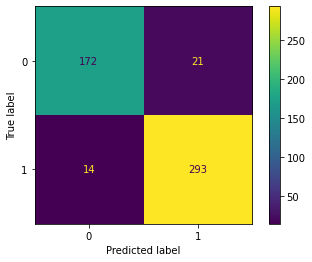

In [56]:
plot_confusion_matrix(model,X_test,y_test)
# if model performing reasonably well then FP and FN should have distinct color from TP and TN

/Users/dipenthapa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


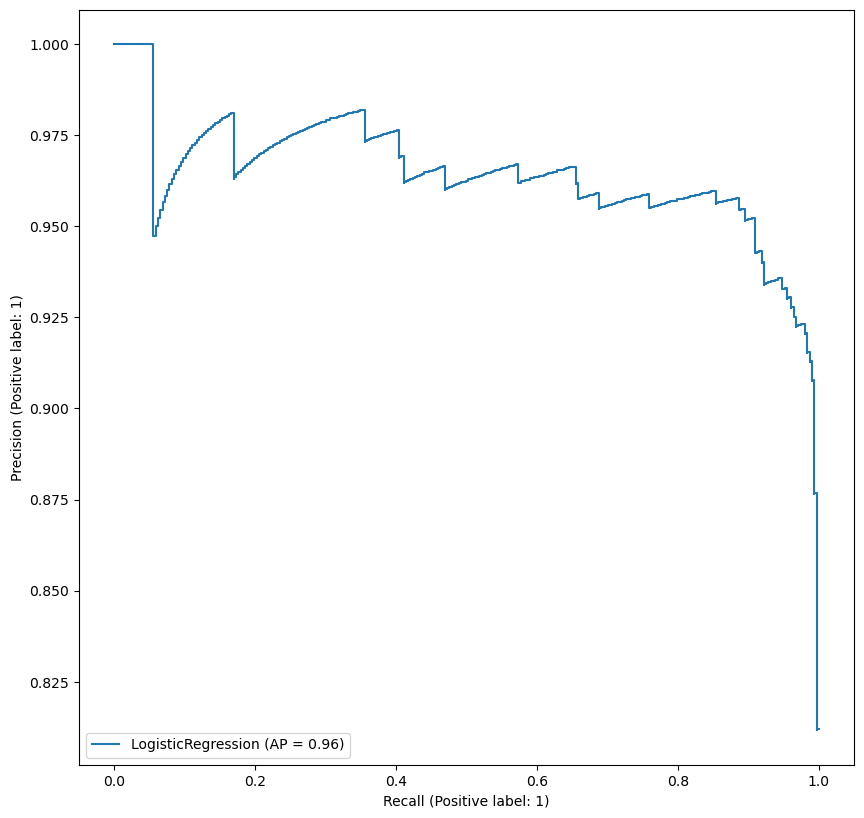

In [64]:
fig, ax=plt.subplots(figsize=(10,10), dpi=100)
plot_precision_recall_curve(model,X_test,y_test, ax=ax)

/Users/dipenthapa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


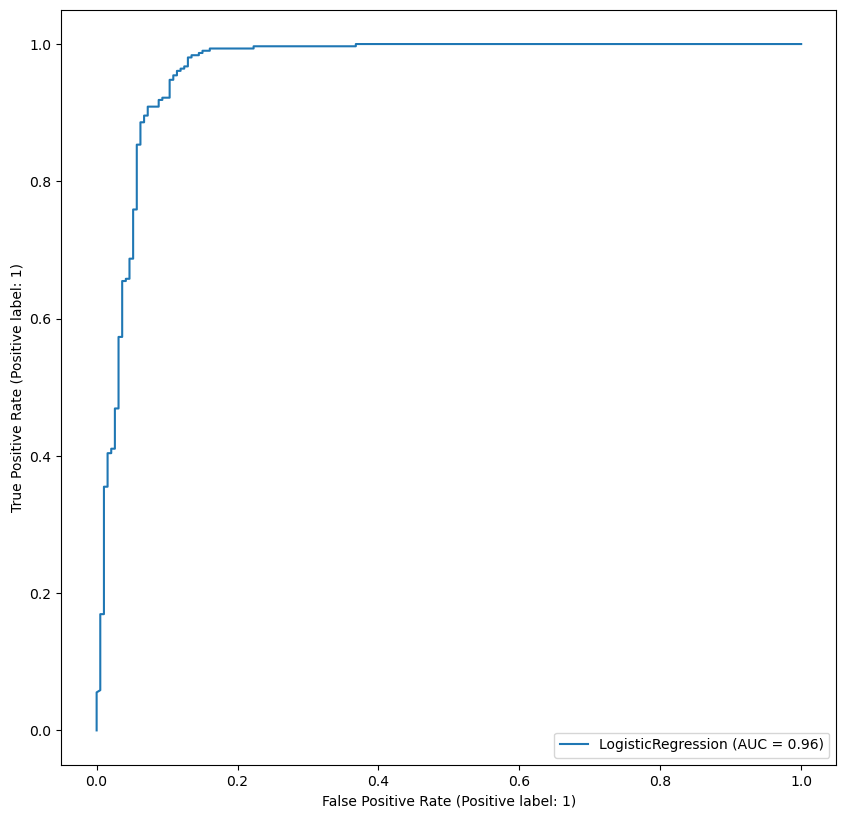

In [63]:
fig, ax=plt.subplots(figsize=(10,10), dpi=100)
plot_roc_curve(model,X_test,y_test,ax=ax)

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

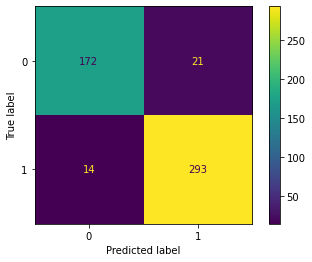

In [69]:
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)

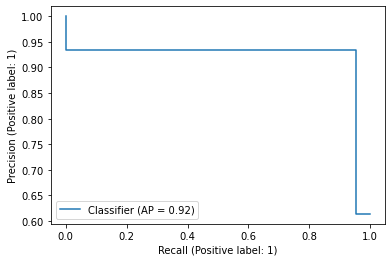

In [74]:
PrecisionRecallDisplay.from_predictions(y_test,pr_test)

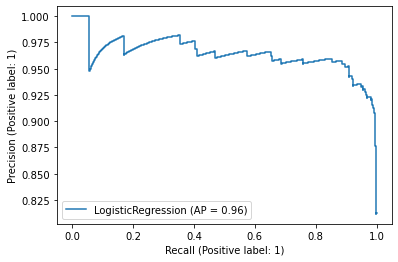

In [72]:
PrecisionRecallDisplay.from_estimator(model,X_test,y_test)

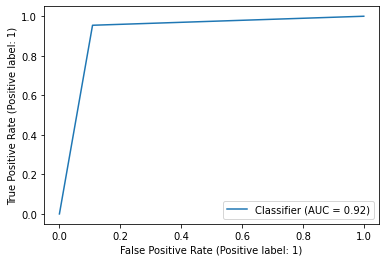

In [75]:
RocCurveDisplay.from_predictions(y_test,pr_test)

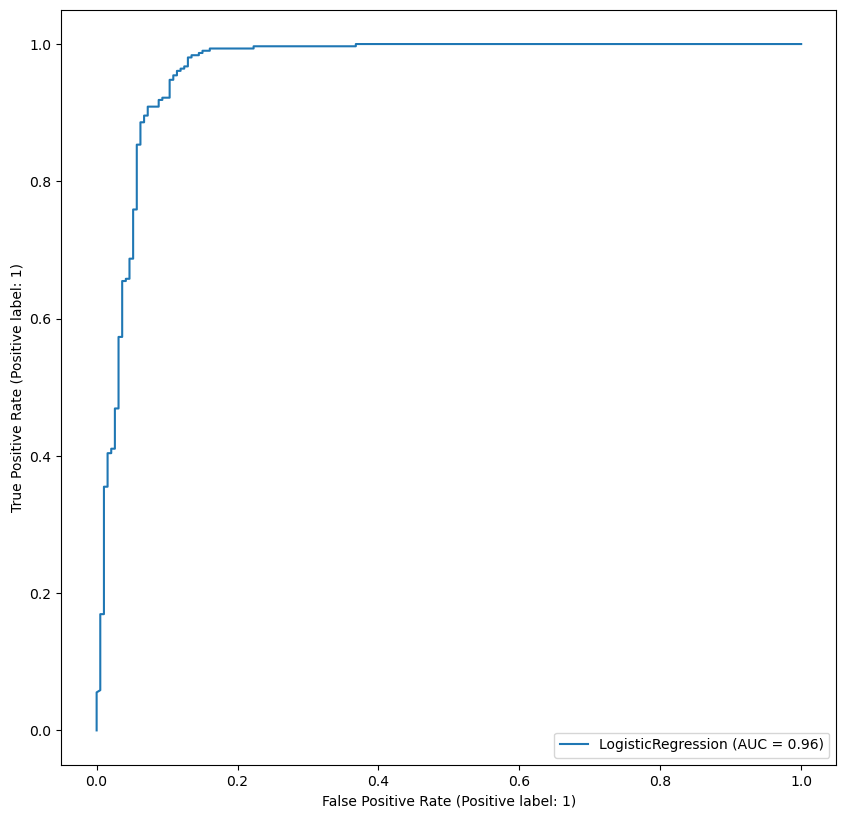

In [77]:
fig, ax=plt.subplots(figsize=(10,10), dpi=100)
RocCurveDisplay.from_estimator(model,X_test,y_test, ax=ax)